In [1]:
!pip install FastF1


In [2]:
import fastf1
fastf1.Cache.enable_cache("D:\F1 data")
session=fastf1.get_session(2023,'Australia','Q')
session.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.3.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:1415: FutureWar

C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time


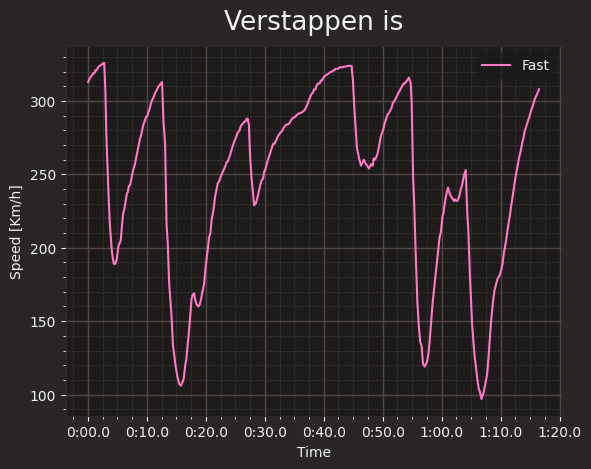

In [3]:
import matplotlib.pyplot as plt
import fastf1.plotting
fastf1.plotting.setup_mpl()
fast_ver = session.laps.pick_driver('VER').pick_fastest()
ver_car_data= fast_ver.get_car_data()
t = ver_car_data['Time']
spd=ver_car_data['Speed']

#making a plot
fig, ax = plt.subplots()
ax.plot(t, spd, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Verstappen is')
ax.legend()
plt.show()

In [4]:
lap=session.laps.pick_fastest()
tel= lap.get_telemetry()

C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of alway

C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ret.loc[:, ch] = ret.loc[:, ch].ffill().ffill().bfill()
C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged.loc[:, col] = merged.loc[:, col].astype(dtype_map[col])
C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new

In [5]:
import numpy as np
x= np.array(tel['X'].values)
y= np.array(tel['Y'].values)
points=np.array([x,y]).T.reshape(-1,1,2)
segments= np.concatenate([points[:-1],points[1:]],axis=1)
gear= tel['nGear'].to_numpy().astype(float)

In [6]:
from matplotlib.collections import LineCollection
cmap= plt.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

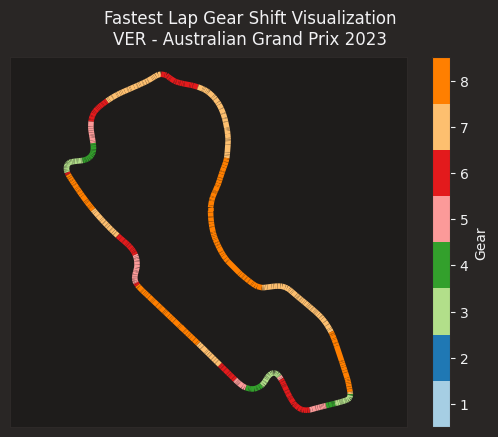

In [7]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()

In [9]:
session.load(telemetry=True)

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.3.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:1415: FutureWar

In [11]:
best_lec = session.laps.pick_driver('LEC').pick_fastest()
best_rus = session.laps.pick_driver('RUS').pick_fastest()

In [18]:
lec_tel = best_lec.get_car_data().add_distance()
rus_tel = best_rus.get_car_data().add_distance()

C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\joshi\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time


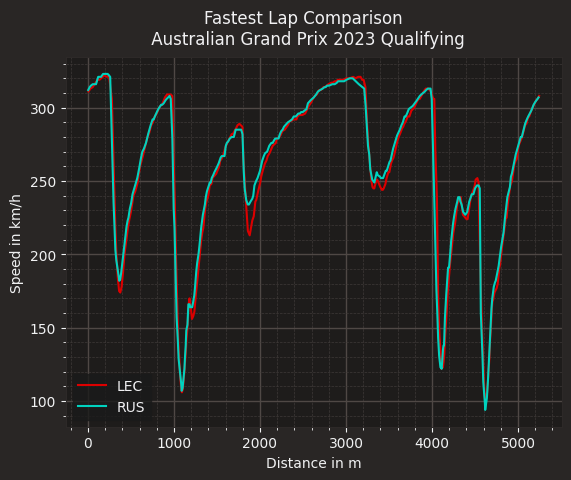

In [20]:
fr_color = fastf1.plotting.team_color('FER')
mer_color = fastf1.plotting.team_color('MER')

fig, ax = plt.subplots()
ax.plot(lec_tel['Distance'], lec_tel['Speed'], color=fr_color, label='LEC')
ax.plot(rus_tel['Distance'], rus_tel['Speed'], color=mer_color, label='RUS')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()